### Histograms

#### Distribution of the Variable
The amount of times that a value appears in the dataset. 

One of the common ways to represent a distribution is by using a histogram, which is a graph showing the frequency of each value for a given variable.

Here is an example:

Text(0, 0.5, 'Frequency')

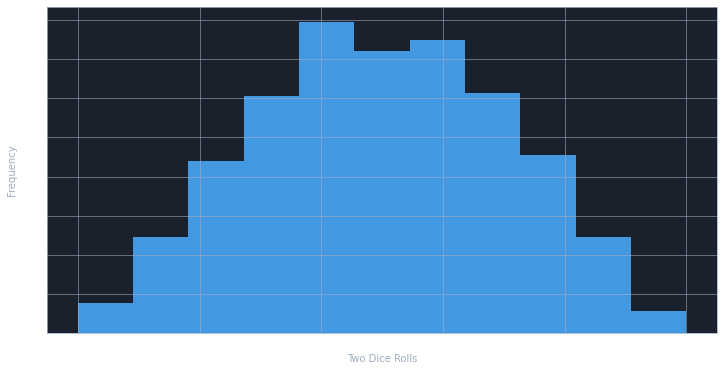

In [1]:
from random import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from cycler import cycler

matplotlib.style.use("dark_background")
%matplotlib inline
rcParams["figure.figsize"] = (12, 6)
rcParams["axes.prop_cycle"] = cycler(color=["#4299E1", "#F56565"])
rcParams["axes.facecolor"] = "#1A202C"
rcParams["axes.edgecolor"] = "#A0AEC0"
rcParams["axes.grid"] = True
rcParams["grid.color"] = "#A0AEC0"
rcParams["grid.alpha"] = 0.7
rcParams["axes.titlecolor"] = "#A0AEC0"
rcParams["axes.labelcolor"] = "#A0AEC0"

# Simulating 1000 rolls of 2 dice
dieRolls1 = [round(random() * 5 + 1) for i in range(0, 1000)]
dieRolls2 = [round(random() * 5 + 1) for i in range(0, 1000)]

# Adding the values of the rolled dice values
dieRollSum = np.array([dieRolls1[i] + dieRolls2[i] for i in range(0, 1000)])
series = pd.Series(dieRollSum)

# Showing the frequency of each value
series.plot.hist(bins=11) # 11 because getting a 1 from two dice is impossible
plt.xlabel("Two Dice Rolls")
plt.ylabel("Frequency")

#### NSFG Data
Now, let's plot the histograms for the NSFG (National Survey of Family Growth) 

Text(0, 0.5, 'Frequency')

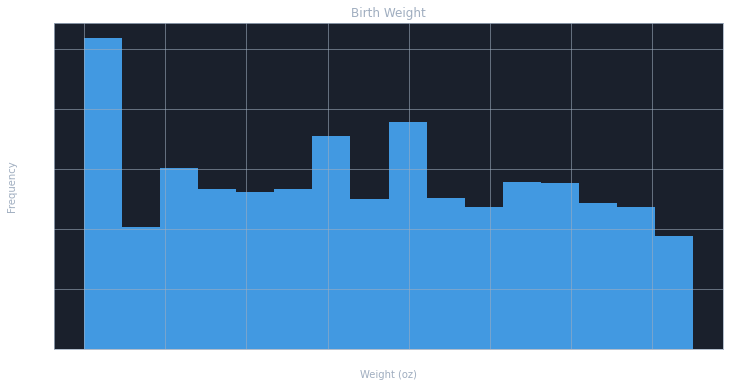

In [2]:
nsfg = pd.read_pickle("nsfg_data.pkl")
liveOutcomes = nsfg[nsfg["outcome"] == 1]
liveOutcomes["birthwgt_oz"].plot.hist(bins=16)
plt.title("Birth Weight")
plt.xlabel("Weight (oz)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

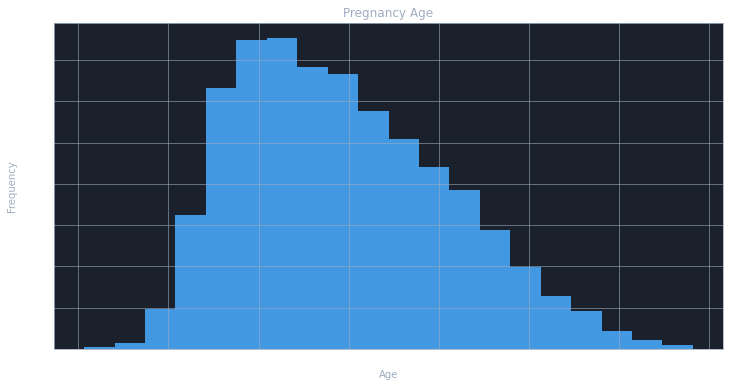

In [3]:
nsfg["agepreg"].plot.hist(bins=20)
plt.title("Pregnancy Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

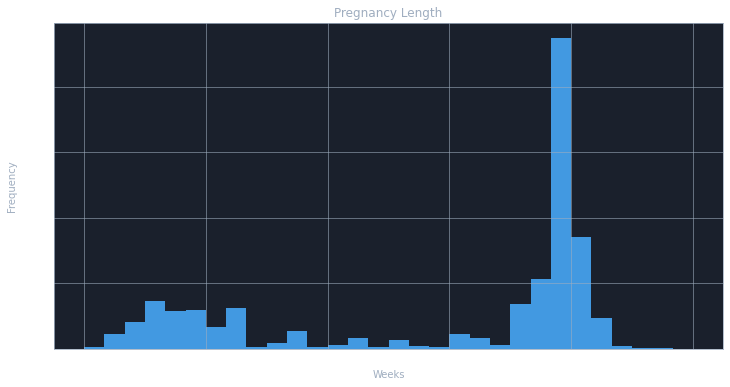

In [4]:
nsfg["prglngth"].plot.hist(bins=30)
plt.title("Pregnancy Length")
plt.xlabel("Weeks")
plt.ylabel("Frequency")

#### Outliers
It is a good idea to check for outliers, which might be caused by errors in measurement, or accurate reports of rare events.

In this case, pregnancy length values below 10 weeks for live births are certainly errors; the most likely explanation is that the outcome was not recorded correctly.

Values higher than 30 are probably legitimate.

Between 10 and 30 weeks, some may be errors, but some may represent premature babies.

#### First babies
Now, let's compare the histograms of pregnancy lengths for first babies and others.

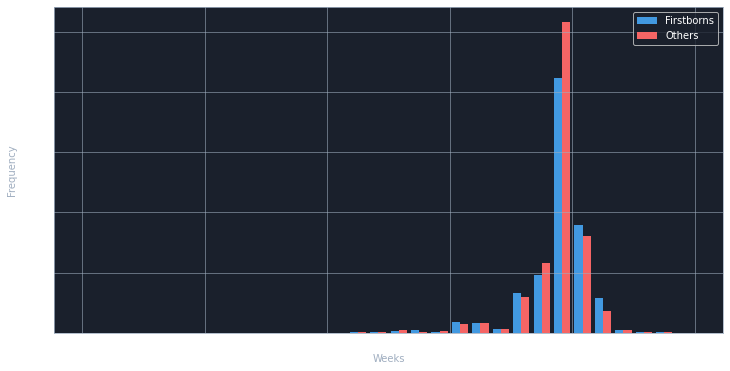

In [5]:
firsts = liveOutcomes[liveOutcomes["birthord"] == 1]
others = liveOutcomes[liveOutcomes["birthord"] != 1]

plt.hist((firsts["prglngth"], others["prglngth"]), bins=30, label=("Firstborns", "Others"))
plt.xlabel("Weeks")
plt.ylabel("Frequency")
plt.legend(loc=1)

And this is the same plot, but normalized. 

Note that the *Probability* (previously *Frequency*) is less than 1. This graph is made so that the integral of the entire function is equal to 1.

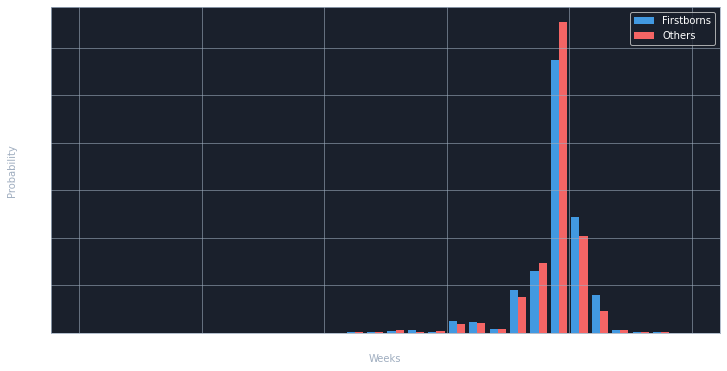

In [6]:
plt.hist((firsts["prglngth"], others["prglngth"]), bins=30, density=True, label=("Firstborns", "Others"))
plt.xlabel("Weeks")
plt.ylabel("Probability")
plt.legend(loc=1)

Here is a 3D histogram showing the relationship of both the pregnancy age and the pregnancy length with regards to the frequency of their values.

There doesn't seem to be any correlation between the pregnancy age and the pregnancy length.

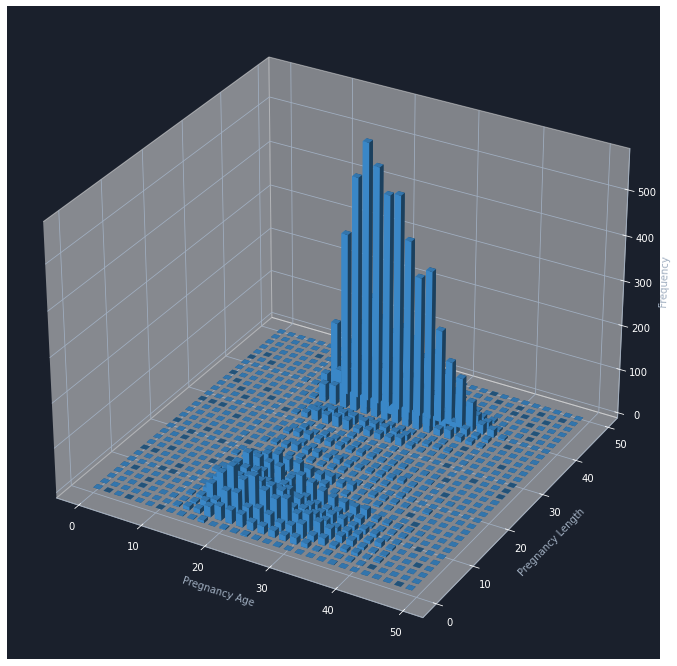

In [7]:
# Creates a figure object, where we can change the size of the figure or add multiple axes
fig = plt.figure(figsize=(12, 12))

# Adds an Axes to a figure
ax = fig.add_subplot(111, projection="3d")

# Creates a histogram for 2 variables
hist, xedges, yedges = np.histogram2d(nsfg["agepreg"], nsfg["prglngth"], bins=30, range=[[0, 50], [0, 50]])

# Creates a standard grid numbering ([0,0], [0,1], [0,2], [1,0], [1,1], ...) to create the bars on
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
# Flattens the array into 1D array
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Sets the width and length of the bar
dx = dy = 1 #np.ones_like(zpos) # Creates a matrix of ones based on the param's shape

# Sets the height of the bar
dz = hist.ravel()

# Creates a 3D bar graph
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort="average")
ax.set_xlabel("Pregnancy Age")
ax.set_ylabel("Pregnancy Length")
ax.set_zlabel("Frequency")

plt.show()